# Image Classification of dog images using Amazon Sagemaker 

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.

This notebooks contains all necessary steps to prepare the dataset, train the model and do hyperparameter tuning and for profiling and debugging.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [24]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.34-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pyinstrument_cext-0.2.4-cp312-cp312-linux_x86_64.whl
Using cached smdebug-1.0.34-py2.py3-none-any.whl (280 kB)
Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3


In [5]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
I am using the dog breed dataset. The task is to classify a given image as one of the 133 given breeds.
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [ ]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip --no-check-certificate
!unzip dogImages.zip

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [1]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
    
)

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128]),
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test Loss ([0-9\\.]+)"}]

/opt/conda/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [3]:
from sagemaker.pytorch import PyTorch

In [6]:
#TODO: Create estimators for your HPs
estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    entry_point="hpo.py",
    framework_version='1.13.1',
    py_version="py39",
    disable_profiler=True,
    debugger_hook_config=False
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [7]:
# TODO: Fit your HP Tuner
inputs = "s3://sagemaker-us-east-1-687648240537"
tuner.fit({"training": inputs}, wait=True) # TODO: Remember to include your data channels

[05/05/25 18:21:04] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=451879;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=509255;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

[05/05/25 18:21:05] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=260579;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=186205;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    WARNING  No finished training job found associated with this estimator.       ]8;id=612490;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py\estimator.py]8;;\:]8;id=972712;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py#1914\1914]8;;\
                             Please make sure this estimator is only used for building workflow                    
                             config                                                                                

                    WARNING  No finished training job found associated with this estimator.       ]8;id=735467;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py\estimator.py]8;;\:]8;id=19490;file:///opt/conda/lib/python3.12/site-packages/sagemaker/estimator.py#1914\1914]8;;\
                             Please make sure this estimator is only used for building workflow                    
                             config                                                                                

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=897459;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=790337;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating hyperparameter tuning job with name:                          ]8;id=185996;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=419752;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#3383\3383]8;;\
                             pytorch-training-250505-1821                                                          

................................................................................................................................................!


In [8]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_hyperparameters = best_estimator.hyperparameters()


2025-05-05 18:33:19 Starting - Found matching resource for reuse
2025-05-05 18:33:19 Downloading - Downloading the training image
2025-05-05 18:33:19 Training - Training image download completed. Training in progress.
2025-05-05 18:33:19 Uploading - Uploading generated training model
2025-05-05 18:33:19 Completed - Resource retained for reuse


In [18]:
final_hyperparameters = {key:val.replace('"',"") for key, val in best_hyperparameters.items() if key in hyperparameter_ranges}
#final_hyperparameters = {"lr": 0.001, "batch-size":128}

In [19]:
final_hyperparameters

{'batch-size': '32', 'lr': '0.0029809265830588946'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [20]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, ProfilerConfig, FrameworkProfile, DebuggerHookConfig, rule_configs

rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "5", "eval.save_interval": "2"}
)


[05/05/25 18:49:52] WARNING  Framework profiling will be deprecated from tensorflow 2.12 and     ]8;id=797382;file:///opt/conda/lib/python3.12/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=845140;file:///opt/conda/lib/python3.12/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             pytorch 2.0 in sagemaker>=2.                                                          
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

In [21]:
# TODO: Create and fit an estimator

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    entry_point="train_model.py",
    framework_version="1.8.0",
    py_version="py3",
    hyperparameters=final_hyperparameters,
    profiler_config=profiler_config,
    rules=rules,
    debugger_hook_config=hook_config
)

In [22]:
inputs = "s3://sagemaker-us-east-1-687648240537"
estimator.fit({"training": inputs},wait=True)

[05/05/25 18:49:56] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=329359;file:///opt/conda/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=755537;file:///opt/conda/lib/python3.12/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=110746;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=17462;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

[05/05/25 18:49:57] INFO     Ignoring unnecessary instance type: None.                            ]8;id=409900;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=939926;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=52427;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=448137;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=303995;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=374342;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=969749;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=336337;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=960398;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=155314;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=160371;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=178709;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=806230;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=35752;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=679831;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=804369;file:///opt/conda/lib/python3.12/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name:                                       ]8;id=881781;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=62145;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#1042\1042]8;;\
                             pytorch-training-2025-05-05-18-49-56-921                                              

2025-05-05 18:50:01 Starting - Starting the training job...
2025-05-05 18:50:33 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2025-05-05 18:50:53 Downloading - Downloading input data...............
2025-05-05 18:53:34 Downloading - Downloading the training image............
2025-05-05 18:55:34 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-05-05 18:55:42,545 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-05-05 18:55:42,576 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-05-05 18:55:42,579 sagemaker_pytorch_container.training INFO     Invoking user training

In [34]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
%pip install --upgrade protobuf==3.20.0
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import proto
proto.__version__

'1.26.1'

In [1]:
debug_output_path = 's3://sagemaker-us-east-1-687648240537/pytorch-training-2025-05-05-18-49-56-921/debug-output'
#debug_output_path = estimator.latest_job_debugger_artifacts_path()

In [3]:
# TODO: Plot a debugging output.

from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(debug_output_path)
trial.tensor_names()

[2025-05-05 20:09:00.410 default:3172 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-687648240537/pytorch-training-2025-05-05-18-49-56-921/debug-output
[2025-05-05 20:09:01.011 default:3172 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2025-05-05 20:09:02.027 default:3172 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer4.0.relu_input_0',
 'layer4.0.relu_input_1',
 'layer4.1.relu_input_0',
 'layer4.1.relu_input_1',
 'relu_input_0']

In [5]:
trial

<smdebug.trials.s3_trial.S3Trial object at 0x7f178b2765d0>:(
    name=debug-output,
    path=s3://sagemaker-us-east-1-687648240537/pytorch-training-2025-05-05-18-49-56-921/debug-output/,
    steps=[0, 209, 508],
    collections=['biases', 'losses', 'all', 'weights', 'default', 'gradients', 'relu_input'],
    tensor_names=['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer3.0.relu_input_0', 'layer3.0.relu_input_1', 'layer3.1.relu_input_0', 'layer3.1.relu_input_1', 'layer4.0.relu_input_0', 'layer4.0.relu_input_1', 'layer4.1.relu_input_0', 'layer4.1.relu_input_1', 'relu_input_0'],
)

In [20]:
print(trial.collections()["losses"])

{'name': 'losses', 'include_regex': ['[Ll]oss_(?!input).*output'], 'tensor_names': ['CrossEntropyLoss_output_0'], 'reduction_config': {'save_raw_tensor': True, 'reductions': '', 'save_shape': False}, 'save_config': {'TRAIN': {'save_interval': 500, 'save_steps': [], 'start_step': 0, 'end_step': None}, 'EVAL': {'save_interval': 500, 'save_steps': [], 'start_step': 0, 'end_step': None}, 'PREDICT': {'save_interval': 500, 'save_steps': [], 'start_step': 0, 'end_step': None}, 'GLOBAL': {'save_interval': 500, 'save_steps': [], 'start_step': 0, 'end_step': None}}, 'save_histogram': False}


In [21]:
trial.tensor('layer3.0.relu_input_0').steps(mode=ModeKeys.EVAL)

[0]

Unfortunately the tensors have not been saved, although I specified the save interval in the train file

In [99]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

In [101]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

1

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


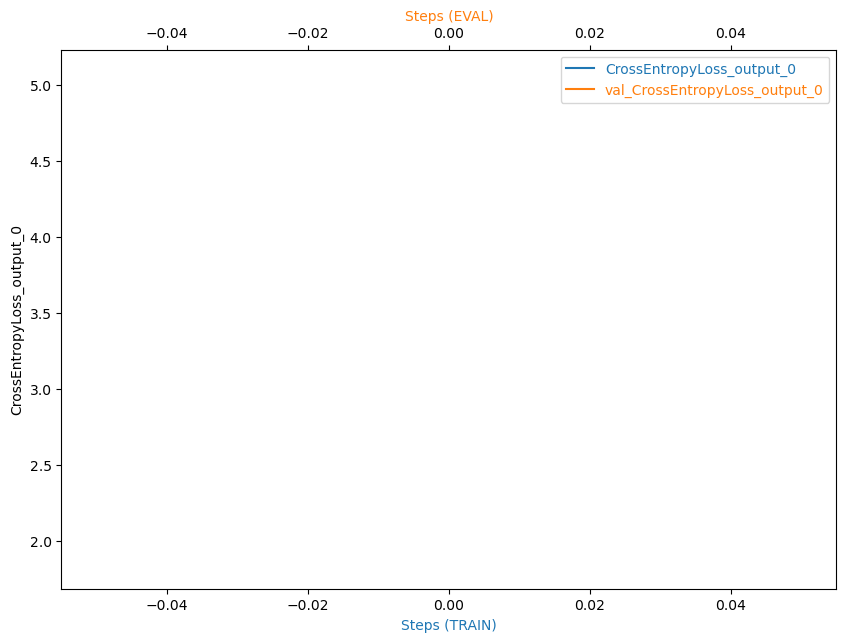

In [67]:
plot_tensor(trial, 'CrossEntropyLoss_output_0')

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  

My goal was to monitor if the train and validation losses constantly decrease. Unfortunately only one loss value has been saved, so I cannot track this behavior.
Nevertheless I can verify from the model output logs that the loss values decreased and the profiler metric for decreasing losses also did not report errors (see profiler report).

**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

If there was a loss anomaly I would have to consider data loading and the model training logic again.

In [30]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"


In [31]:
!aws s3 ls {rule_output_path} --recursive
!aws s3 cp {rule_output_path} ./ --recursive

2025-05-05 19:01:51     448493 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-report.html
2025-05-05 19:01:51     309324 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2025-05-05 19:01:44        570 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2025-05-05 19:01:44      13221 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2025-05-05 19:01:44       2001 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2025-05-05 19:01:44        326 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2025-05-05 19:01:44       1143 pytorch-training-2025-05-05-18-49-56-921/rule-output/ProfilerReport/profiler-output/profiler-re

In [32]:
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [33]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [49]:
# TODO: Deploy your model to an endpoint
from sagemaker.pytorch import PyTorchModel
model_data = estimator.output_path + estimator.latest_training_job.job_name + "/output/model.tar.gz"
print(f"Model: {model_data}")
role = sagemaker.get_execution_role()
pytorch_model = PyTorchModel(
    model_data=model_data, 
    role=role, 
    entry_point='inference.py',
    py_version="py3",
    framework_version="1.8.0"
)

predictor=pytorch_model.deploy(initial_instance_count=1, instance_type="ml.t2.medium") # TODO: Add your deployment configuration like instance type and number of instances

Model: s3://sagemaker-us-east-1-687648240537/pytorch-training-2025-05-05-18-49-56-921/output/model.tar.gz


[05/05/25 19:52:51] INFO     Repacking model artifact                                                  ]8;id=821037;file:///opt/conda/lib/python3.12/site-packages/sagemaker/model.py\model.py]8;;\:]8;id=562009;file:///opt/conda/lib/python3.12/site-packages/sagemaker/model.py#821\821]8;;\
                             (s3://sagemaker-us-east-1-687648240537/pytorch-training-2025-05-05-18-49-             
                             56-921/output/model.tar.gz), script artifact (None), and dependencies                 
                             ([]) into single tar.gz file located at                                               
                             s3://sagemaker-us-east-1-687648240537/pytorch-inference-2025-05-05-19-52-             
                             50-938/model.tar.gz. This may take some time depending on model size...               

[05/05/25 19:52:56] INFO     Creating model with name: pytorch-inference-2025-05-05-19-52-56-059    ]8;id=31636;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=200243;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name                                     ]8;id=933081;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=705987;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#5937\5937]8;;\
                             pytorch-inference-2025-05-05-19-52-56-897                                             

[05/05/25 19:52:57] INFO     Creating endpoint with name pytorch-inference-2025-05-05-19-52-56-897  ]8;id=631417;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=623597;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4759\4759]8;;\

-----------!

In [50]:
# TODO: Run an prediction on the endpoint
from PIL import Image
# TODO: Your code to load and preprocess image to send to endpoint for prediction
image = Image.open("dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg")
import torchvision.transforms as transforms
transform_comp_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transformed_image = transform_comp_test(image)

In [51]:
transformed_image = transformed_image.unsqueeze(0)

In [52]:
import numpy as np
transformed_image_numpy = transformed_image.numpy()

In [53]:
transformed_image_numpy.shape

(1, 3, 224, 224)

In [54]:
response = predictor.predict(transformed_image_numpy)

In [58]:
predicted_class = np.argmax(response)+1

In [59]:
print(f"Predicted class:{predicted_class}")

Predicted class:1


In [60]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

[05/05/25 20:04:56] INFO     Deleting endpoint configuration with name:                             ]8;id=196544;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=45409;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4913\4913]8;;\
                             pytorch-inference-2025-05-05-19-52-56-897                                             

                    INFO     Deleting endpoint with name: pytorch-inference-2025-05-05-19-52-56-897 ]8;id=107142;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=710307;file:///opt/conda/lib/python3.12/site-packages/sagemaker/session.py#4903\4903]8;;\